In [1]:
pip install tensorflow

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
dataset_path = 'C:/Users/palut/Desktop/jupyter_notebook/Dataset/Warp-D'
#ImageDataGenerator help in real time data augmentation of images based on original data

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.3,
                             horizontal_flip=True,
                             rotation_range=45)

In [4]:
train_data = datagen.flow_from_directory(os.path.join(dataset_path, 'train'),
                                         target_size=(224, 224),#resizes the image,ensure consistency in input size
                                         batch_size=100,#each batch will contain 100 images
                                         subset='training')
val_data = datagen.flow_from_directory(os.path.join(dataset_path, 'train'),
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='validation')

Found 1717 images belonging to 2 classes.
Found 735 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(1, 1),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [7]:
from PIL import Image

In [8]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])                       
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model_history=model.fit(train_data, validation_data=val_data, callbacks=[early_stopping])
val_loss=model_history.history['val_loss']




18/18 [==============================] - 898s 49s/step - loss: 1.4490 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [10]:
test_data = datagen.flow_from_directory(r'C:\Users\palut\Desktop\jupyter_notebook\Dataset\Warp-D\test',
                                        target_size=(224, 224),
                                       batch_size=100,
                                        shuffle=False)

Found 522 images belonging to 2 classes.


In [11]:
loss, accuracy = model.evaluate(test_data)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

6/6 [==============================] - 32s 5s/step - loss: 0.6931 - accuracy: 0.5000
Test loss: 0.6931494474411011
Test accuracy: 0.5


In [12]:
from tensorflow.keras.preprocessing.image import load_img

image_path = r'C:\Users\palut\Desktop\jupyter_notebook\Dataset\Warp-D\test\images\Monitoring_photo_2_test_25-Mar_11-12-02.jpg'
image = load_img(image_path, target_size=(224, 224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = image_array / 255.0
image_array = image_array.reshape((1, 224, 224, 3))

In [13]:
predictions = model.predict(image_array)
confidence = predictions[0]

1/1 [==============================] - 0s 316ms/step


In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


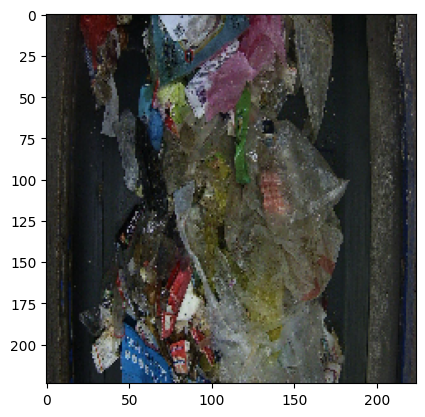

In [15]:
import matplotlib.pyplot as plt
image_array1 = image_array.reshape((224, 224, 3))
plt.imshow(image_array1)
plt.show()

In [16]:
class_label = 'plastic waste' if confidence >= 0.50 else 'non-plastic waste'
print('Prediction:', class_label)
print('Confidence:', confidence)

Prediction: plastic waste
Confidence: [0.5010664]
